In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.impute import KNNImputer

In [87]:

def random_imputation(df, column):
    # Get the values of the column excluding NaN values
    non_null_values = df[column].dropna().values
    
    # Impute NaN values with random choices from non-null values
    df[column] = df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    
    return df

def mean_imputation(df, column):
    # Calculate the mean of the column, excluding NaN values
    mean_value = df[column].mean()
    
    # Impute NaN values with the calculated mean
    df[column] = df[column].fillna(mean_value)
    
    return df

df = pd.read_csv("Chicago_Energy_Benchmarking.csv")
unique, counts = np.unique(df['Chicago Energy Rating'], return_counts=True)
print (dict(zip(unique, counts)))
# print(df.head())
df = df.drop('Property Name', axis=1)
# print(df.head())

{0.0: 3595, 1.0: 2092, 1.5: 682, 2.0: 1556, 2.5: 1072, 3.0: 1530, 3.5: 1377, 4.0: 4417, nan: 8570}


In [ ]:
#main preprocessing starts here

#########################################################################################################################3

df = df.dropna(subset=['Chicago Energy Rating'], axis=0)


# df = df.dropna(subset=['ZIP Code'], axis=0)
# df = df.dropna(subset=['Community Area'], axis=0)
# df = df.dropna(subset=['Primary Property Type'], axis=0)
# df = df.dropna(subset=['Year Built'], axis=0)
# df = df.dropna(subset=['# of Buildings'], axis=0)
# df = df.dropna(subset=['Gross Floor Area - Buildings (sq ft)'], axis=0)
# df = df.dropna(subset=['Electricity Use (kBtu)'], axis=0)
# df = df.dropna(subset=['Natural Gas Use (kBtu)'], axis=0)
# df = df.dropna(subset=['Weather Normalized Site EUI (kBtu/sq ft)'], axis=0)

# print(df.shape[0])

# missing_per_column = df.isnull().sum()

# # Count total missing values in the DataFrame
# total_missing = df.isnull().sum().sum()

# print("Missing values per column:\n", missing_per_column)
# print("Total missing values:", total_missing)


df = df.drop('Water Use (kGal)', axis=1)
df = df.drop('District Steam Use (kBtu)', axis=1)
df = df.drop('District Chilled Water Use (kBtu)', axis=1)
le = LabelEncoder()
df['ZIP_encoded'] = le.fit_transform(df['ZIP Code'])
df = df.drop('ZIP Code', axis=1)
# print(df.head())
df['Commarea_encoded'] = le.fit_transform(df['Community Area'])
df = df.drop('Community Area', axis=1)
df['Primary Property Type_encoded'] = le.fit_transform(df['Primary Property Type'])
df = df.drop('Primary Property Type', axis=1)
df = df.drop('Site EUI (kBtu/sq ft)', axis=1)
df = df.drop('Source EUI (kBtu/sq ft)', axis=1)
df = df.drop('Total GHG Emissions (Metric Tons CO2e)', axis=1)
df = df.drop('GHG Intensity (kg CO2e/sq ft)', axis=1)
# df = df.drop('ENERGY STAR Score', axis=1)
# print(df.head())

df = df.drop('Weather Normalized Source EUI (kBtu/sq ft)', axis=1)

missing_per_column = df.isnull().sum()

# Count total missing values in the DataFrame
total_missing = df.isnull().sum().sum()



Missing values per column:
 Chicago Energy Rating                          0
Gross Floor Area - Buildings (sq ft)        1248
Year Built                                  3390
# of Buildings                              3090
ENERGY STAR Score                           5034
Electricity Use (kBtu)                      3440
Natural Gas Use (kBtu)                      4044
Weather Normalized Site EUI (kBtu/sq ft)    4510
ZIP_encoded                                    0
Commarea_encoded                               0
Primary Property Type_encoded                  0
dtype: int64
Total missing values: 24756
16321


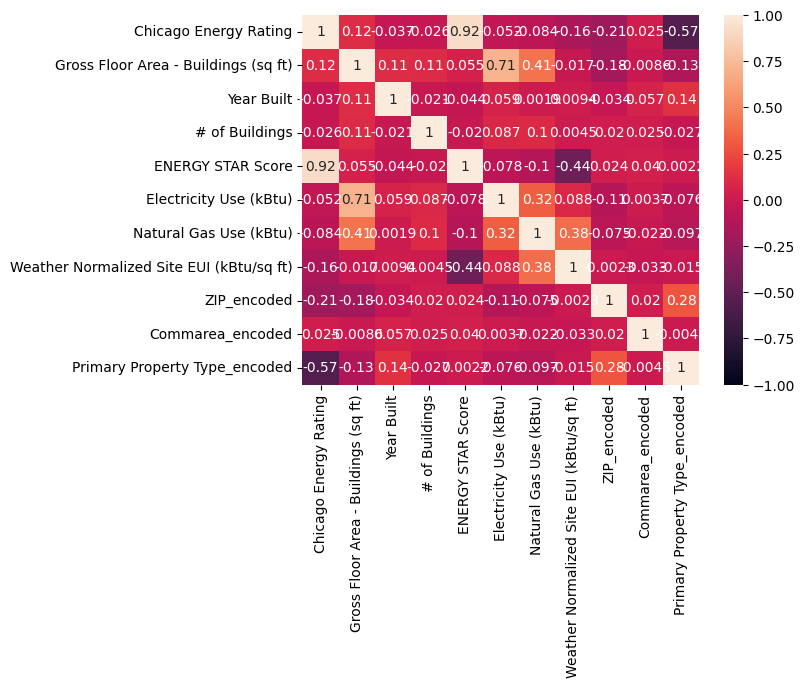

None


In [89]:
print("Missing values per column:\n", missing_per_column)
print("Total missing values:", total_missing)
print(df.shape[0])
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)

print(plt.show())

In [ ]:

Features = df.drop('Chicago Energy Rating', axis=1)
target = df['Chicago Energy Rating']
print("Checkpoint")
print(target.shape)
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=13)


AAAAAAAAAAAAAAAAAAAAAAAAAA
(16321,)


In [ ]:

# Data leak fix
print(X_train.head)
X_train = random_imputation(X_train, 'ZIP_encoded')
X_train = random_imputation(X_train, 'Commarea_encoded')
X_train = random_imputation(X_train, 'Primary Property Type_encoded')


# df = mean_imputation(df, 'Year Built')
# df = mean_imputation(df, '# of Buildings')

X_train = mean_imputation(X_train, 'Gross Floor Area - Buildings (sq ft)')
X_train = mean_imputation(X_train, 'Electricity Use (kBtu)')
# df = mean_imputation(df, 'Natural Gas Use (kBtu)')
X_train = mean_imputation(X_train, 'Weather Normalized Site EUI (kBtu/sq ft)')


imputer = KNNImputer(n_neighbors=7)

dfnotdf = imputer.fit_transform(X_train)
X_train = pd.DataFrame(dfnotdf, columns=X_train.columns)

X_test = random_imputation(X_test, 'ZIP_encoded')
X_test = random_imputation(X_test, 'Commarea_encoded')
X_test = random_imputation(X_test, 'Primary Property Type_encoded')


# df = mean_imputation(df, 'Year Built')
# df = mean_imputation(df, '# of Buildings')

X_test = mean_imputation(X_test, 'Gross Floor Area - Buildings (sq ft)')
X_test = mean_imputation(X_test, 'Electricity Use (kBtu)')
# df = mean_imputation(df, 'Natural Gas Use (kBtu)')
X_test = mean_imputation(X_test, 'Weather Normalized Site EUI (kBtu/sq ft)')


imputer = KNNImputer(n_neighbors=7)

dfnotdftest = imputer.fit_transform(X_test)
X_test = pd.DataFrame(dfnotdftest, columns=X_test.columns)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


<bound method NDFrame.head of        Gross Floor Area - Buildings (sq ft)  Year Built  # of Buildings  \
13864                               78700.0      1927.0             1.0   
21200                              130000.0      1912.0             1.0   
4116                               126211.0         NaN             1.0   
17985                               90000.0      2005.0             1.0   
14506                              638592.0      1906.0             1.0   
...                                     ...         ...             ...   
19088                              418826.0      2004.0             1.0   
15579                              218500.0      1975.0             1.0   
78                                 103012.0      1931.0             1.0   
22930                              644940.0      1920.0             1.0   
356                                 80000.0      1926.0             1.0   

       ENERGY STAR Score  Electricity Use (kBtu)  Natural Gas Use (kB

(3265,)
The mean absolute error (MAE) on train set: 0.1280
The r2 score on train set: 0.9659
[3.94563435 0.50487132 1.13353828 ... 1.53254623 3.96823454 2.55084394]
[4.  1.  1.  ... 1.5 4.  2.5]
The mean absolute error (MAE) on test set: 0.3190
The r2 score on test set: 0.8666


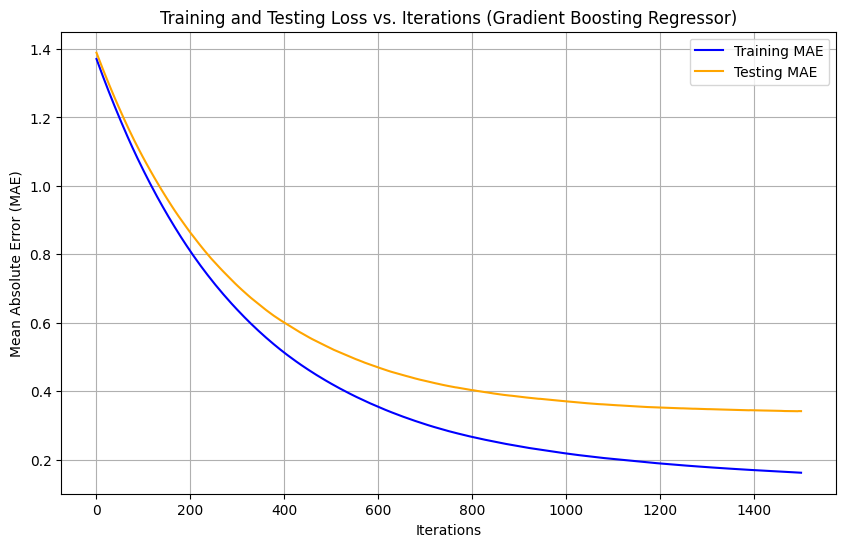

In [ ]:
#Grad boost reg

print(y_test.shape)
params = {
    "learning_rate": 0.003,
    "n_estimators": 1500,
    "max_depth": 10,
    "min_samples_split": 5,
    "loss": "squared_error",
    "subsample": 0.9,
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

predtrain = reg.predict(X_train)
for i,n in enumerate(predtrain):
    predtrain[i] = round(n*2)/2
    if predtrain[i] == 0.5:
        predtrain[i] = round(n)


mae = mean_absolute_error(y_train, predtrain)
print("The mean absolute error (MAE) on train set: {:.4f}".format(mae))
r2 = r2_score(y_train, predtrain)
print("The r2 score on train set: {:.4f}".format(r2))

pred = reg.predict(X_test)
print(pred)
for i,n in enumerate(pred):
    pred[i] = round(n*2)/2
    if pred[i] == 0.5:
        pred[i] = round(n)

print(pred)


mae = mean_absolute_error(y_test, pred)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
r2 = r2_score(y_test, pred)
print("The r2 score on test set: {:.4f}".format(r2))
train_mae = []
test_mae = []

for train_pred, test_pred in zip(reg.staged_predict(X_train), reg.staged_predict(X_test)):
    train_mae.append(mean_absolute_error(y_train, train_pred))
    test_mae.append(mean_absolute_error(y_test, test_pred))

iterations = range(1, len(train_mae) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, train_mae, label="Training MAE", color="blue")
plt.plot(iterations, test_mae, label="Testing MAE", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Training and Testing Loss vs. Iterations (Gradient Boosting Regressor)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# LINEAR REGRESSION 
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

lin_reg_y_pred = regr.predict(X_test)

lin_reg_y_pred_rounded = np.round(lin_reg_y_pred * 2) / 2

mse = mean_absolute_error(y_test, lin_reg_y_pred_rounded)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2 = r2_score(y_test, lin_reg_y_pred_rounded)
print("The r2 score on test set: {:.4f}".format(r2))

# LASSO REGRESSION

l_reg = Lasso(alpha = 0.1, random_state = 9)  
l_reg.fit(X_train, y_train)    
l_reg_Y_pred = l_reg.predict(X_test)


for i,n in enumerate(l_reg_Y_pred):
    l_reg_Y_pred[i] = round(n*2)/2

mse = mean_absolute_error(y_test, l_reg_Y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2 = r2_score(y_test, l_reg_Y_pred)
print("The r2 score on test set: {:.4f}".format(r2))

# RIDGE REGRESSION 

r_reg = Ridge(solver = 'svd', alpha=1, random_state = 10)     
r_reg.fit(X_train, y_train)   
r_reg_Y_pred = r_reg.predict(X_test)  

for i,n in enumerate(r_reg_Y_pred):
    r_reg_Y_pred[i] = round(n*2)/2

mse = mean_absolute_error(y_test, r_reg_Y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2 = r2_score(y_test, r_reg_Y_pred)
print("The r2 score on test set: {:.4f}".format(r2))


The mean squared error (MSE) on test set: 0.5308
The r2 score on test set: 0.6956
The mean squared error (MSE) on test set: 0.5634
The r2 score on test set: 0.7026
The mean squared error (MSE) on test set: 0.5308
The r2 score on test set: 0.6956


Epoch 1/250
3/3 - 1s - loss: 2.0455 - val_loss: 1.6492 - 559ms/epoch - 186ms/step
Epoch 2/250
3/3 - 0s - loss: 1.3319 - val_loss: 1.1332 - 152ms/epoch - 51ms/step
Epoch 3/250
3/3 - 0s - loss: 0.9451 - val_loss: 0.8417 - 144ms/epoch - 48ms/step
Epoch 4/250
3/3 - 0s - loss: 0.7821 - val_loss: 0.7403 - 162ms/epoch - 54ms/step
Epoch 5/250
3/3 - 0s - loss: 0.7041 - val_loss: 0.6479 - 149ms/epoch - 50ms/step
Epoch 6/250
3/3 - 0s - loss: 0.6398 - val_loss: 0.6090 - 144ms/epoch - 48ms/step
Epoch 7/250
3/3 - 0s - loss: 0.5952 - val_loss: 0.5624 - 142ms/epoch - 47ms/step
Epoch 8/250
3/3 - 0s - loss: 0.5649 - val_loss: 0.5357 - 148ms/epoch - 49ms/step
Epoch 9/250
3/3 - 0s - loss: 0.5342 - val_loss: 0.4937 - 152ms/epoch - 51ms/step
Epoch 10/250
3/3 - 0s - loss: 0.5023 - val_loss: 0.4753 - 146ms/epoch - 49ms/step
Epoch 11/250
3/3 - 0s - loss: 0.4805 - val_loss: 0.4692 - 145ms/epoch - 48ms/step
Epoch 12/250
3/3 - 0s - loss: 0.4631 - val_loss: 0.4547 - 140ms/epoch - 47ms/step
Epoch 13/250
3/3 - 0s - 

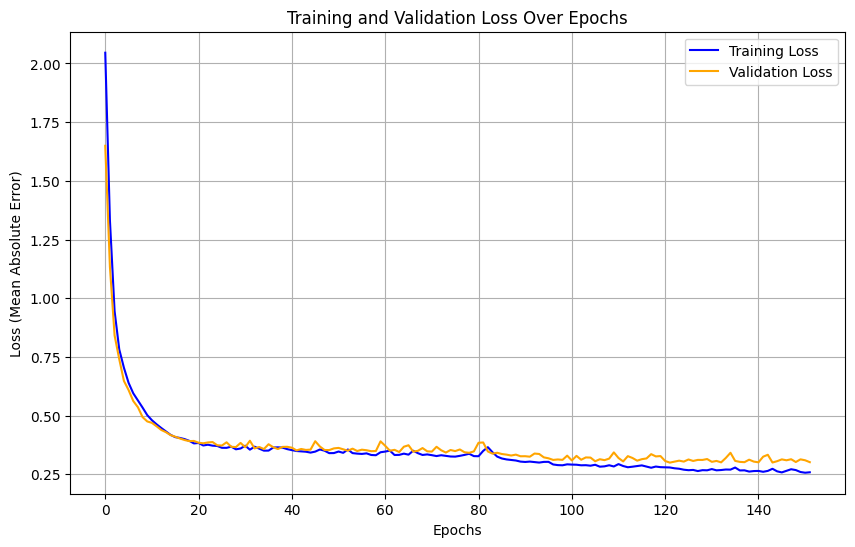

In [ ]:
# NN Approach

model = tf.keras.Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(320, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'), 
    layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.008), 
              loss='mean_absolute_error')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,              
    restore_best_weights=True 
)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,      
    epochs=250,
    batch_size=4096,
    callbacks=[early_stopping], 
    verbose=2
)

NN_predictions = model.predict(X_test)
NN_predictions_rounded = np.round(NN_predictions * 2) / 2

NN_predictionstrain = model.predict(X_train)
NN_predictions_roundedtrain = np.round(NN_predictionstrain * 2) / 2

mae = mean_absolute_error(y_train, NN_predictions_roundedtrain)
print("The mean absolute error on train set: {:.4f}".format(mae))
r2 = r2_score(y_train, NN_predictions_roundedtrain)
print("The r2 score on train set: {:.4f}".format(r2))

mae = mean_absolute_error(y_test, NN_predictions_rounded)
print("The mean absolute error on test set: {:.4f}".format(mae))
r2 = r2_score(y_test, NN_predictions_rounded)
print("The r2 score on test set: {:.4f}".format(r2))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Absolute Error)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()